In [1]:
import scvelo as scv
scv.settings.verbosity = 0
import unitvelo as utv

(Running UniTVelo 0.2.5.2)
2023-02-05 12:07:56


In [2]:
import tensorflow as tf
print ("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = '1'
velo_config.AGENES_R2 = 1

label = 'original_clusters'

------> Manully Specified Parameters <------
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Extracted 2000 highly variable genes.
Computing moments for 2000 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 1141 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 1008 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 1003 (Criterion: genes have reads in more than 5% of total cells)
Using GPU card: 0


Loss (Total): 19461.250, (Spliced): 10988.501, (Unspliced): 8472.749: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 11998/12000 [07:24<00:00, 23.51it/s]

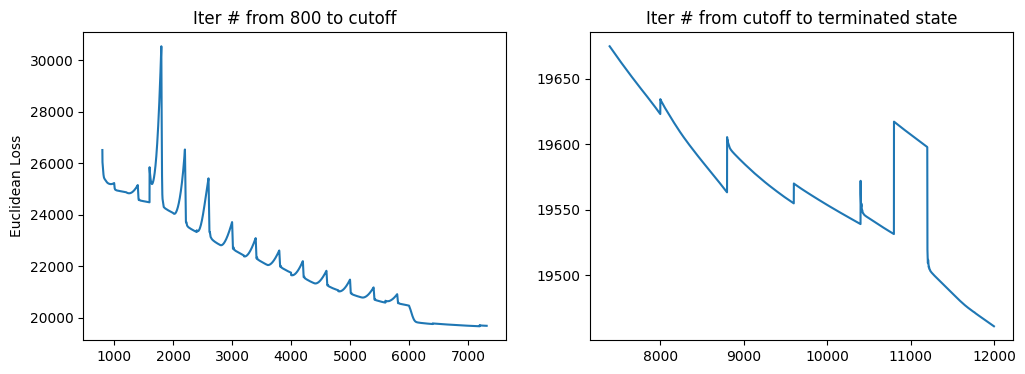

Loss (Total): 19461.250, (Spliced): 10988.501, (Unspliced): 8472.749: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 11999/12000 [07:41<00:00, 26.00it/s]

Total loss 19461.250, vgene loss 19461.250


  0%|          | 0/2430 [00:00<?, ?cells/s]

In [6]:
adata = utv.run_model('anndata_raw.h5ad', label, config_file=velo_config)

In [34]:
adata.obsm["X_umap"] = ad.read_h5ad("anndata.h5ad").obsm["X_umap"]

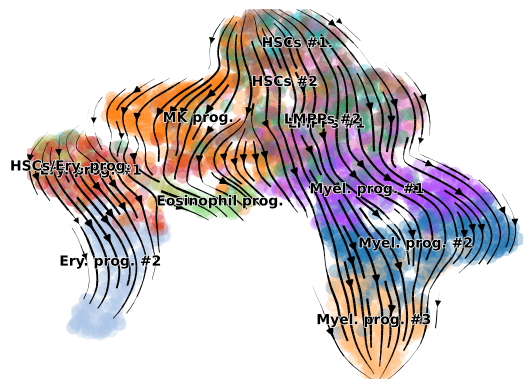

In [40]:
scv.pl.velocity_embedding_stream(adata, color=adata.uns['label'], dpi=100, title='', basis = "X_umap")

In [37]:
# adata.obsm["X_umap"] = adata.obsm["original_umap"]

In [22]:
import numpy as np
import anndata as ad
import scipy as sp
import matplotlib.pyplot as plt
adata.obsp['T_fwd']=scv.utils.get_transition_matrix(adata).astype(np.float64)
adata.obsp['T_fwd']/=adata.obsp["T_fwd"].sum(-1)
adata.obsp['T_fwd'] = sp.sparse.csr_matrix(adata.obsp["T_fwd"])

In [23]:
import pandas as pd
df = pd.read_csv("../ery/Mus_musculus_TF", sep = "\t")
adata.var['istf'] = np.isin(adata.var.index.str.lower(), df.Symbol.str.lower())

In [28]:
adata.write_h5ad("anndata_unitvelo.h5ad")
# np.save("X.npy", adata.X[:, adata.var.istf].todense())
# np.save("P.npy", adata.obsp["T_fwd"].todense())
# np.save("X_pca.npy", adata.obsm["X_pca"])
# np.save("X_umap.npy", adata.obsm["X_umap"])
# np.save("louvain.npy", np.array(adata.obs.louvain.astype(int)))
# np.save("leiden.npy", np.array(adata.obs.leiden.astype(int)))
# np.save("dpt.npy", adata.obs.velocity_pseudotime)

In [29]:
np.save("P_unitvelo.npy", adata.obsp["T_fwd"].todense())